In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed/ebi_base_processed_model.csv', index_col=0)
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,-0.325787,0,0.416667,2,-0.762398,1,1,1,0.009204,1,0,0
1,-0.439823,0,0.333333,1,-0.105466,1,0,1,0.123165,0,0,1
2,0.503568,0,0.166667,1,-0.762398,2,0,0,-0.067380,0,0,0
3,2.068975,0,0.500000,2,0.221424,1,1,1,-0.217472,0,0,1
4,-0.056246,1,0.583333,8,0.129282,2,1,0,0.502038,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1.550628,0,-0.666667,2,-0.762398,2,0,0,0.685465,0,0,0
8996,-1.393581,1,-0.166667,10,-0.312704,1,1,1,0.012776,0,0,0
8997,0.607237,0,-0.083333,7,-0.762398,1,0,1,-0.594149,1,0,0
8998,1.260354,1,0.416667,3,-0.173917,2,1,0,-0.076930,1,1,0


In [3]:
corr_churn = df.corr(numeric_only=True)['churn'].sort_values(ascending=False)
corr_churn

churn               1.000000
age                 0.283851
country_Germany     0.172445
balance             0.119345
estimated_salary    0.013179
credit_card        -0.006995
tenure             -0.010050
credit_score       -0.029545
products_number    -0.049373
country_Spain      -0.052124
gender             -0.104959
active_member      -0.151216
Name: churn, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = df['churn']
X= df.drop(columns=['churn'])
X

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain
0,-0.325787,0,0.416667,2,-0.762398,1,1,1,0.009204,0,0
1,-0.439823,0,0.333333,1,-0.105466,1,0,1,0.123165,0,1
2,0.503568,0,0.166667,1,-0.762398,2,0,0,-0.067380,0,0
3,2.068975,0,0.500000,2,0.221424,1,1,1,-0.217472,0,1
4,-0.056246,1,0.583333,8,0.129282,2,1,0,0.502038,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8995,1.550628,0,-0.666667,2,-0.762398,2,0,0,0.685465,0,0
8996,-1.393581,1,-0.166667,10,-0.312704,1,1,1,0.012776,0,0
8997,0.607237,0,-0.083333,7,-0.762398,1,0,1,-0.594149,0,0
8998,1.260354,1,0.416667,3,-0.173917,2,1,0,-0.076930,1,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

tree_default = DecisionTreeClassifier(random_state=42)
tree_default.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [6]:
from sklearn.metrics import classification_report
y_pred = tree_default.predict(X_test)

train_score = tree_default.score(X_train, y_train)
test_score = tree_default.score(X_test, y_test)

print(train_score, test_score)

print(classification_report(y_test, y_pred))



1.0 0.7988888888888889
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1434
           1       0.51      0.51      0.51       366

    accuracy                           0.80      1800
   macro avg       0.69      0.69      0.69      1800
weighted avg       0.80      0.80      0.80      1800



In [7]:
tree_generalized = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=42)
tree_generalized.fit(X_train, y_train)
y_pred = tree_generalized.predict(X_test)

train_score = tree_generalized.score(X_train, y_train)
test_score = tree_generalized.score(X_test, y_test)

print(train_score, test_score)

print(classification_report(y_test, y_pred))

0.8588888888888889 0.8577777777777778
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1434
           1       0.73      0.47      0.57       366

    accuracy                           0.86      1800
   macro avg       0.80      0.71      0.74      1800
weighted avg       0.85      0.86      0.85      1800



In [8]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


tree_generalized_smot = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=42)

tree_generalized_smot.fit(X_train_smote, y_train_smote)

train_score_smot = tree_generalized_smot.score(X_train_smote, y_train_smote)
test_score_smot = tree_generalized_smot.score(X_test, y_test)

print(train_score_smot, test_score_smot)

y_pred= tree_generalized_smot.predict(X_test)
print(classification_report(y_test, y_pred))

0.8039762818276944 0.7688888888888888
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1434
           1       0.46      0.70      0.55       366

    accuracy                           0.77      1800
   macro avg       0.68      0.74      0.70      1800
weighted avg       0.82      0.77      0.78      1800



/Users/mihai/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


age                 0.471738
products_number     0.221091
active_member       0.135318
balance             0.090999
gender              0.050010
country_Germany     0.015698
estimated_salary    0.005595
tenure              0.004001
credit_card         0.003185
credit_score        0.002365
country_Spain       0.000000
dtype: float64


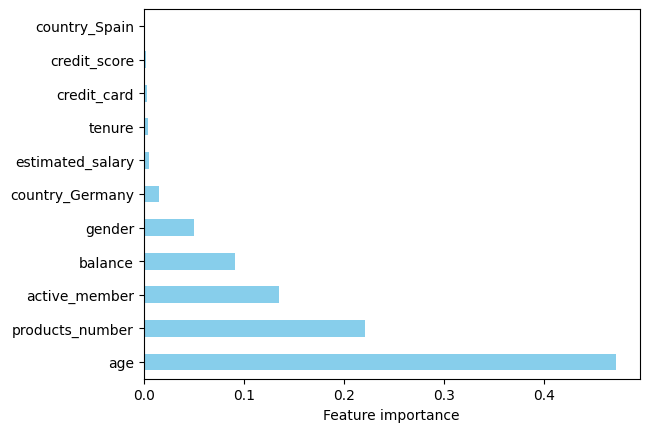

In [13]:
import matplotlib.pyplot as plt
importance_features_smote = pd.Series(tree_generalized_smot.feature_importances_, index= X_train_smote.columns).sort_values(ascending=False)
print(importance_features_smote)
importance_features_smote.plot(kind='barh', color='skyblue')
plt.xlabel('Feature importance')
plt.show()